In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
from matplotlib import rcParams
import scipy.constants as sc
import pandas as pd
from numba import njit
rcParams["figure.figsize"] = (4,2)

In [15]:
R = 10 # in au
a = 3e-5 # cm
v0 = 0.
z0 = 0.
Omega = (np.sqrt(sc.G * 2e30) * 1.5e11**(-1.5)) * R**(-1.5)
sd = 30 * (1/R) # in g/cm2
rhos = 3.5 # in g/cm3
c_s = 1.5 * R**(-0.25) # in km/s
H_R = c_s / Omega / (1.5e8) / R
eta = H_R**2
s_dot = 2e-12 * (R/10)**(-1.5)

St0 = np.sqrt(2*np.pi)* a * rhos / sd
u0 = np.sqrt(2*np.pi) / Omega * s_dot / sd
Stb = St0 / u0
H_c_s = 1/Omega / (3600*24*365) # in yr

print('eta', eta)
print('St_0', St0)
print('St_b', Stb)
print('u0', u0)
print('max_z', 1/Stb)
print('T', H_c_s)

eta 0.007995360639369134
St_0 8.7731989612085e-05
St_b 0.33017202586934385
u0 0.00026571599874667285
max_z 3.02872418511834
T 5.042111229030723


In [23]:
@njit
def gendyn(dt0):
    z_2 = z0
    z_1 = dt0 * v0
    t_list = [0, dt0]
    z_list = [z_2, z_1]
    t_loc = dt0
    n=int(1.5e9)
    def f(eta,z): return np.exp( -1/eta * (1 - ( 1 + eta*z**2 )**(-0.5) ) )
    for i in range(n):
    #     u_1 = u0 * f(eta,z_1)
    #     print(u_1)
        dt = dt0 / f(eta,z_1)
        z_0 = 2 * z_1 - z_2 + dt * ( - (z_1 - z_2) / (St0) * f(eta,z_1) ) + dt**2 * ( 1/Stb - z_1 )
        z_list.append(z_0)
        z_2 = z_1
        z_1 = z_0
        t_loc+=dt
        t_list.append(t_loc)
    return t_list, z_list

In [24]:
b = gendyn(1e-1*St0)
c = np.sum(~np.isnan(b[1]))

: 

(0.0, 0.23960658970760304)

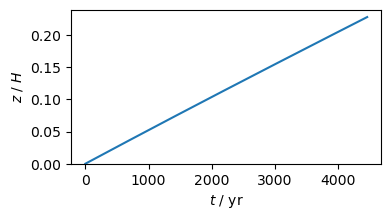

In [22]:
rcParams['figure.figsize'] = (4,2)
plt.plot([i*H_c_s for i in b[0][:c]][::100],b[1][:c][::100],c='C0')
plt.xlabel('$t$ / yr')
plt.ylabel('$z$ / $H$')
# plt.xlim(0,400)
plt.ylim(0)
# plt.title('Time evolution, $a=0.1\,\mathrm{cm}$, $R=10\,\mathrm{au}$', fontsize=9)